In [26]:
import time
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
from sklearn.metrics import *
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [2]:
ROOT_PATH = '~/project/TIL/'
DATA_PATH = f'{ROOT_PATH}/AI_study/dataset/protein'

In [3]:
df     = pd.read_csv(f'{DATA_PATH}/pdb_data_no_dups.csv').set_index('structureId')
df_seq = pd.read_csv(f'{DATA_PATH}/pdb_data_seq.csv').set_index('structureId')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141401 entries, 100D to 9XIM
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   classification            141399 non-null  object 
 1   experimentalTechnique     141401 non-null  object 
 2   macromoleculeType         137636 non-null  object 
 3   residueCount              141401 non-null  int64  
 4   resolution                128589 non-null  float64
 5   structureMolecularWeight  141401 non-null  float64
 6   crystallizationMethod     96242 non-null   object 
 7   crystallizationTempK      97039 non-null   float64
 8   densityMatthews           124724 non-null  float64
 9   densityPercentSol         124749 non-null  float64
 10  pdbxDetails               118534 non-null  object 
 11  phValue                   105110 non-null  float64
 12  publicationYear           117602 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage:

In [4]:
merged_df = pd.merge(df, df_seq, on='structureId', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471811 entries, 100D to 9XIM
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   classification            471807 non-null  object 
 1   experimentalTechnique     471811 non-null  object 
 2   macromoleculeType_x       435379 non-null  object 
 3   residueCount_x            471811 non-null  int64  
 4   resolution                449845 non-null  float64
 5   structureMolecularWeight  471811 non-null  float64
 6   crystallizationMethod     314863 non-null  object 
 7   crystallizationTempK      317806 non-null  float64
 8   densityMatthews           390156 non-null  float64
 9   densityPercentSol         390278 non-null  float64
 10  pdbxDetails               385664 non-null  object 
 11  phValue                   340901 non-null  float64
 12  publicationYear           414031 non-null  float64
 13  chainId                   471139 non-null  objec

In [5]:
merged_df = merged_df.drop(['publicationYear', 'chainId', 
                            'macromoleculeType_x', 'macromoleculeType_y'], axis = 1)
merged_df.shape

(471811, 13)

classification              0
experimentalTechnique       0
residueCount_x              0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
sequence                    0
residueCount_y              0
dtype: int64


/tmp/ipykernel_11722/219210790.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), cmap = 'BuPu')


<AxesSubplot: >

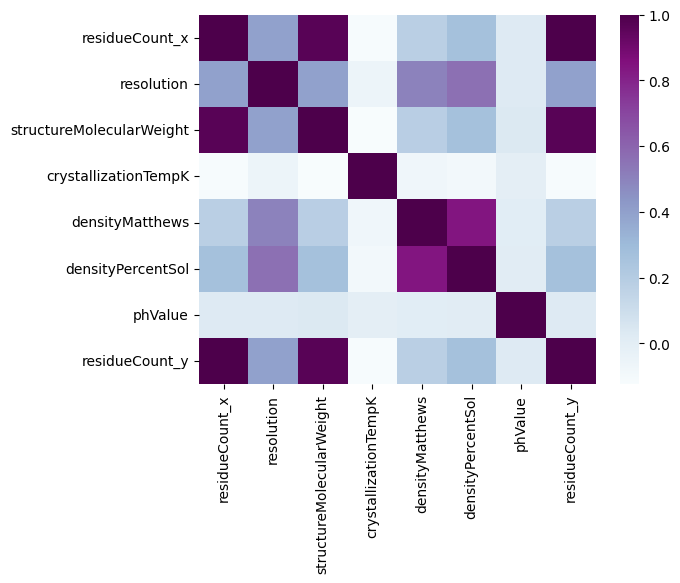

In [6]:
merged_df = merged_df.dropna(how = 'any')
print(merged_df.isnull().sum())

sns.heatmap(merged_df.corr(), cmap = 'BuPu')

/tmp/ipykernel_11722/373868875.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), cmap = 'BuPu')


<AxesSubplot: >

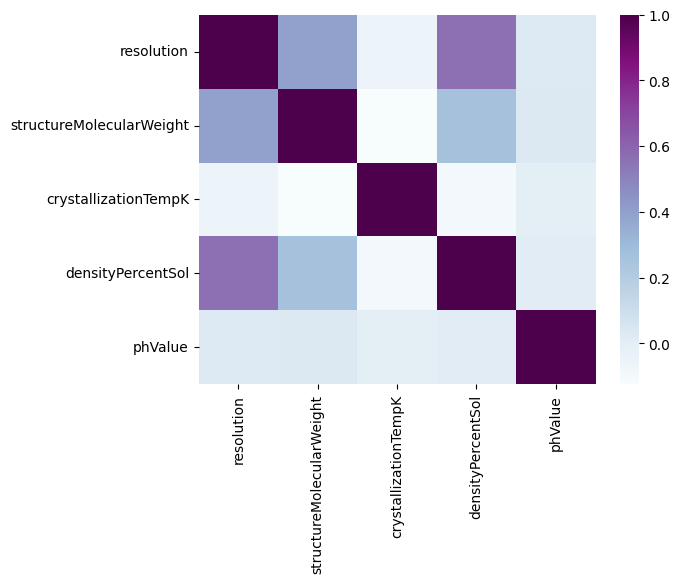

In [8]:
merged_df = merged_df.drop(['residueCount_x', 'residueCount_y',
                           'densityMatthews'], axis = 1)

sns.heatmap(merged_df.corr(), cmap = 'BuPu')

2762


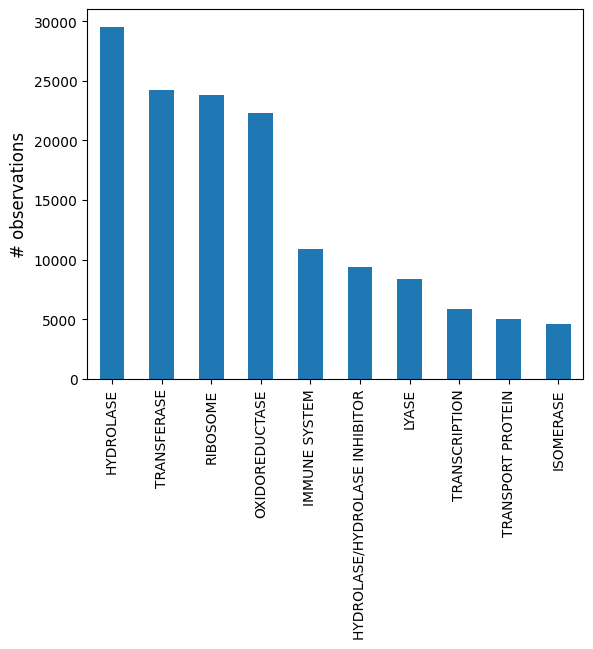

In [10]:
merged_df['classification'].value_counts()[:10].plot(kind = 'bar')
plt.ylabel('# observations', fontsize = 12)
print(merged_df.classification.nunique())

In [11]:
counts     = merged_df.classification.value_counts()
class_data = np.asarray(counts[(counts > 15000)].index)
class_data = merged_df[merged_df.classification.isin(class_data)]

class_data.classification.value_counts()

HYDROLASE         29559
TRANSFERASE       24236
RIBOSOME          23858
OXIDOREDUCTASE    22287
Name: classification, dtype: int64

In [13]:
cat_transformer = OrdinalEncoder()
cat_features    = ['crystallizationMethod', 'experimentalTechnique',
                  'pdbxDetails', 'sequence', 'classification']

transformed_cat          = cat_transformer.fit_transform(class_data[cat_features])
class_data[cat_features] = transformed_cat 

class_data.head(10)

/tmp/ipykernel_11722/3682642545.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_data[cat_features] = transformed_cat


,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityPercentSol,pdbxDetails,phValue,sequence
structureId,,,,,,,,,,
1A72,1.0,4.0,2.60,40658.50,119.0,277.0,46.82,18151.0,8.40,19585.0
1AR4,1.0,4.0,1.90,45428.53,191.0,277.0,32.00,22390.0,6.10,1616.0
1AR4,1.0,4.0,1.90,45428.53,191.0,277.0,32.00,22390.0,6.10,1616.0
1AR5,1.0,4.0,1.60,45430.34,191.0,277.0,32.20,22394.0,6.15,1616.0
1AR5,1.0,4.0,1.60,45430.34,191.0,277.0,32.20,22394.0,6.15,1616.0
1AUE,3.0,4.0,2.33,24203.73,119.0,277.0,45.00,18510.0,8.00,2174.0
1AUE,3.0,4.0,2.33,24203.73,119.0,277.0,45.00,18510.0,8.00,2174.0
1AUK,0.0,4.0,2.10,52423.45,119.0,291.0,63.00,22391.0,5.40,17964.0
1AVM,1.0,4.0,1.55,45514.38,222.0,277.0,31.70,18467.0,6.15,1616.0


([<matplotlib.axis.XTick at 0x7f898ab6d040>,
 [Text(0, 0, 'Hydrolase'),
  Text(1, 0, 'Oxidoreductase'),
  Text(2, 0, 'Ribosom'),
  Text(3, 0, 'Transferase')])

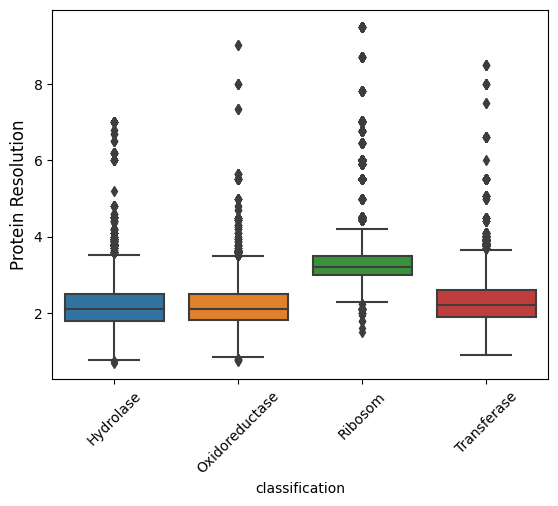

In [16]:
sns.boxplot(x = class_data['classification'],
            y = class_data['resolution'], data = pd.melt(class_data))

plt.ylabel('Protein Resolution', fontsize = 12)
plt.xticks([0, 1, 2, 3], ['Hydrolase', 'Oxidoreductase', 'Ribosom', 'Transferase'],
           rotation = 45,)

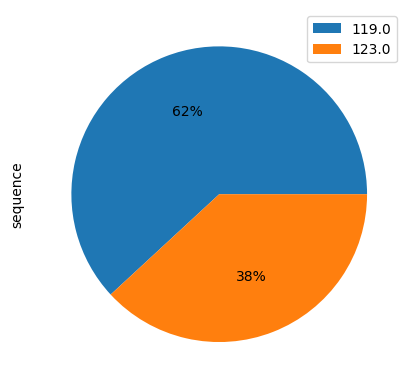

In [19]:
count     = class_data.crystallizationMethod.value_counts(ascending = False)
top_count = np.asarray(count[(count > 15000)].index)
top_CM    = class_data[class_data.crystallizationMethod.isin(top_count)]

fig       = top_CM.groupby(['crystallizationMethod']).sum().plot(kind = 'pie',
                            y = 'sequence', autopct = '%1.0f%%', labels = None)

In [20]:
scaler   = MinMaxScaler()
x        = class_data.drop(['classification', 'experimentalTechnique',
                         'pdbxDetails', 'resolution', 'densityPercentSol'], axis = 1)
y        = class_data.classification

x_minmax = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_minmax, y, test_size = 0.2,
                                                   random_state = 42)

x.columns

Index(['structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'phValue', 'sequence'],
      dtype='object')

/opt/conda/envs/dove/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


               precision    recall  f1-score   support

    Hydrolase       0.80      0.84      0.82      5867
Oxidreductase       0.82      0.82      0.82      4443
     Ribosome       1.00      0.99      1.00      4759
  Transferase       0.81      0.77      0.79      4919

     accuracy                           0.85     19988
    macro avg       0.86      0.86      0.86     19988
 weighted avg       0.85      0.85      0.85     19988



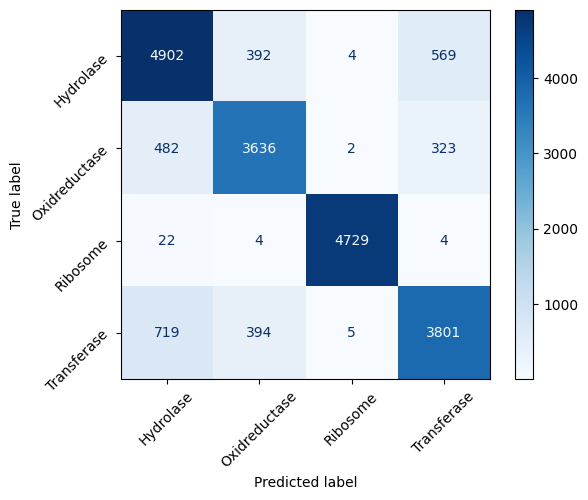

In [24]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

labels = ['Hydrolase', 'Oxidreductase', 'Ribosome', 'Transferase']

y_pred = knn.predict(x_test)
plot_confusion_matrix(knn, x_test, y_test, cmap = plt.cm.Blues, values_format = '.5g',
                      display_labels = labels)

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

print(classification_report(y_test, y_pred, target_names = labels))

In [27]:
knn = KNeighborsClassifier()

begin_knn = time.time()
params    = {'n_neighbors' : np.arange(1, 25, 1)}

clf = GridSearchCV(knn, params, cv = 10)
clf.fit(x_train, y_train)

print(f'total runtime : {time.time() - begin_knn}')
clf.best_score_

total runtime : 542.4062674045563


0.93741244293191

Text(0, 0.5, 'Mean Error')

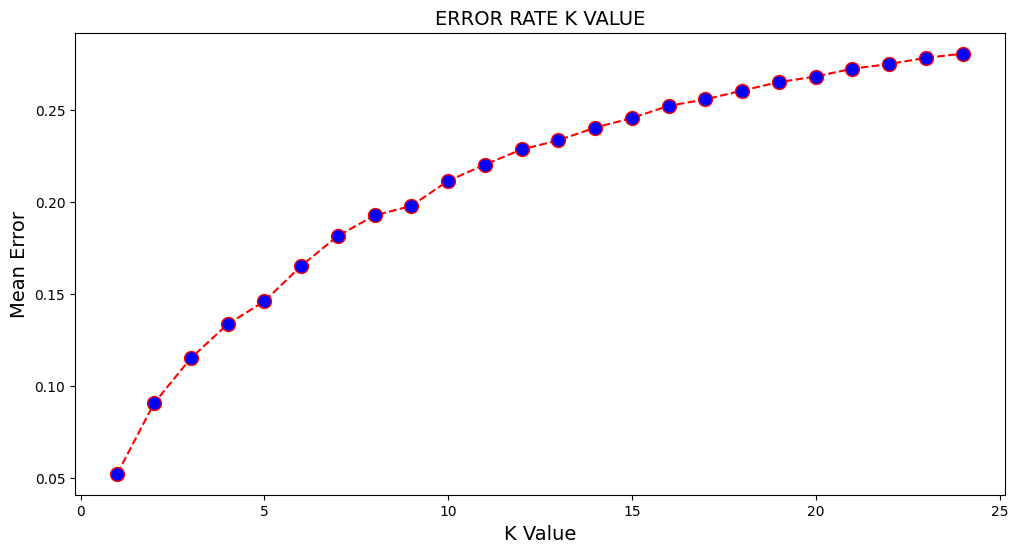

In [30]:
accuracy, error = [], []

for idx in range(1, 25):
    
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(x_train, y_train)
    
    pred_idx = knn.predict(x_test)
    error.append(np.mean(pred_idx != y_test))
    accuracy.append(np.mean(pred_idx == y_test))
    

plt.figure(figsize = (12, 6))
plt.plot(range(1, 25), error, color = 'red', markerfacecolor = 'blue',
         linestyle = 'dashed', marker = 'o', markersize = 10)
plt.title('ERROR RATE K VALUE', fontsize = 14)
plt.xlabel('K Value', fontsize = 14)
plt.ylabel('Mean Error', fontsize = 14)

Text(0, 0.5, 'Mean Accuracy')

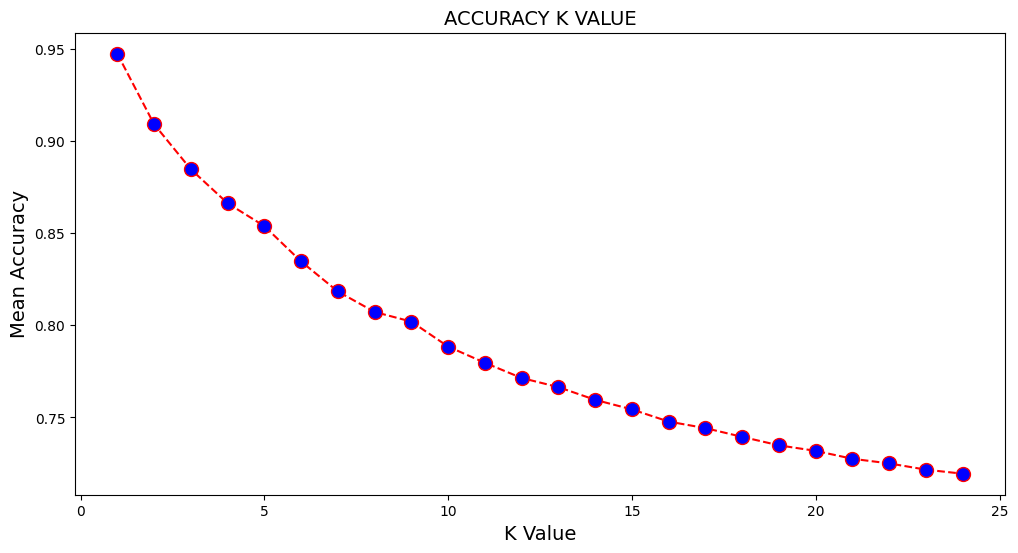

In [32]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 25), accuracy, color = 'red', markerfacecolor = 'blue',
         linestyle = 'dashed', marker = 'o', markersize = 10)
plt.title('ACCURACY K VALUE', fontsize = 14)
plt.xlabel('K Value', fontsize = 14)
plt.ylabel('Mean Accuracy', fontsize = 14)

In [34]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=1)